In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy

In [2]:
from sklearn.datasets import make_blobs

# The KMeans Algorithm

The algorithm essentially works in a few repeated steps:

1. Select $k$ centroids $c_1,\ c_2,\ \dots,\ c_k$, to define $k$ clusters. *(Your selection here is arbitrary.)*
2. Assign each point to the closest centroid, i.e., define $k$ clusters by their centroids, precisely $c_1,\ c_2,\ \dots,\ c_k$. Log the whether or not there have been changes in cluster assignment.
3. For each cluster, define the "average point" $c_1',\ c_2',\ \dots,\ c_k'$, or $k$ new centroids. That is, if `X_i` is the Numpy array (shape `(n_i, 2)`) of all the $n_i$ points in cluster $c_i$, then $c_i'$ = `X_i.mean(axis=0)`.
4. Repeat steps 2 and 3 until there are no new cluster assignments.

## 1. Initialize our algorithm
Define our data (our initial points), and define a distance metric. We also define our algorithm as per the instructions above. Arbitrarily, we'll initialize our centroids as the first k points. 

### *(Optional)*
*After you create a functioning algorithm, try other initial centroid states. E.g., random points, perimeter points, etc. Do some initial centroid states make the algorithm run faster than others?*

In [3]:
points, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

In [4]:
def distance(A, B):
    squares = [(a - b) ** 2 for a, b in zip(A, B)]
    return sum(squares) ** 0.5

In [11]:
def KMeans(points,k=3):
    clusters = np.zeros(len(points))
    centroids = deepcopy(points[:k])
    while assign(points,centroids,clusters):
        update(points,centroids,clusters)
    plt.scatter([p[0] for p in points],[p[1] for p in points],c=clusters)
    plt.show()

## 2. Update Centroids

Assume we already have defined clusters from the last iteration. Then, any centroid is just the average of all points in its cluster.

In [10]:
def update(points,centroids,clusters):
    cluster_groups = np.unique(clusters)
    
    for i, group in enumerate(cluster_groups):
        cluster_indexes = np.where(clusters == group)
        cluster_points = []
        for index in cluster_indexes:
            cluster_points.append(points[index])
        average = np.mean(cluster_points)
        centroids[i] = average    
        
    
    return None  # you don't need to return anything since the variables are shared in the `KMeans` function

## 3. Reassign Points

For each point, find the distance to all centroids and assign it to the closest one. The distance function is already available above.

In [61]:
def assign(points,centroids,clusters):
    
    centroid_list = [tuple(centroid) for centroid in centroids]
    centroid_names = dict(zip(centroid_list,[1, 2, 3]))
    init_clusters = deepcopy(clusters)
    for i, point in enumerate(points):
        distances = {}
        for centroid in centroids:
            current_dist = distance(point, centroid)
            distances[current_dist] = centroid
        closest_dist = np.min(list(distances.keys()))
        
        clusters[i] = centroid_names.get((tuple(distances[closest_dist])))
    
    if np.array_equiv(init_clusters,clusters):
        return False
    else: 
        return True
        # has there been a change in clusters?

We have a points array of length 100. We create "clusters" to be a list of the same length. We can use it to assign each point a cluster number. We will have k "centroids".

## 4. Rinse, Repeat
Run the algorithm 'till it's done!

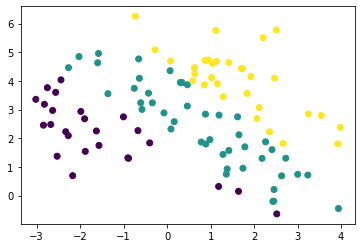

In [62]:
KMeans(points, k=3)